In [26]:
from pathlib import Path
from collections import defaultdict
import matplotlib.pyplot as plt
import json
import yaml
import os

In [27]:
config_path = Path("../../config/config.yaml")
with open(config_path) as f:
    config = yaml.safe_load(f)

project_root = Path("../..").resolve()
root_dir = project_root / config['TABULAR_DATA']

print(root_dir)

D:\spring-2026-group4\data\multi-modal-dataset\sp500_table


In [28]:
required_files = [
    'condensed_consolidated_balance_sheets.json',
    'condensed_consolidated_statement_of_cash_flows.json',
    'condensed_consolidated_statement_of_equity.json'
]

In [29]:
all_dirs = [d for d in root_dir.iterdir() if d.is_dir()]
stock_tickers = sorted([d.name for d in all_dirs])

print(f"Total stock directories found: {len(stock_tickers)}")

Total stock directories found: 2676


In [30]:
stocks_with_all_files = []
stocks_missing_files = []
stocks_extra_files = []
file_inventory = defaultdict(list)

for ticker in stock_tickers:
    stock_path = root_dir / ticker
    existing_files = [f.name for f in stock_path.glob('*.json')]

    missing = set(required_files) - set(existing_files)
    extra = set(existing_files) - set(required_files)

    if not missing and not extra:
        stocks_with_all_files.append(ticker)
    if missing:
        stocks_missing_files.append({'ticker': ticker, 'missing': list(missing)})
    if extra:
        stocks_extra_files.append({'ticker': ticker, 'extra': list(extra)})
    for file in existing_files:
        file_inventory[file].append(ticker)

if stocks_missing_files:
    print(f"\n{'─' * 80}")
    print("STOCKS WITH MISSING FILES:")
    print(f"{'─' * 80}")
    for item in stocks_missing_files[:20]:
        print(f"  {item['ticker']}: Missing {', '.join(item['missing'])}")
    if len(stocks_missing_files) > 20:
        print(f"  ... and {len(stocks_missing_files) - 20} more")

if stocks_extra_files:
    print(f"\n{'─' * 80}")
    print("STOCKS WITH EXTRA FILES:")
    print(f"{'─' * 80}")
    for item in stocks_extra_files[:20]:
        print(f"  {item['ticker']}: Extra {', '.join(item['extra'])}")
    if len(stocks_extra_files) > 20:
        print(f"  ... and {len(stocks_extra_files) - 20} more")

# File distribution
print(f"\n{'─' * 80}")
print("FILE TYPE DISTRIBUTION:")
print(f"{'─' * 80}")
for file_type in required_files:
    count = len(file_inventory[file_type])
    percentage = (count / len(stock_tickers)) * 100
    print(f"  {file_type}: {count} stocks ({percentage:.1f}%)")


────────────────────────────────────────────────────────────────────────────────
FILE TYPE DISTRIBUTION:
────────────────────────────────────────────────────────────────────────────────
  condensed_consolidated_balance_sheets.json: 2676 stocks (100.0%)
  condensed_consolidated_statement_of_cash_flows.json: 2676 stocks (100.0%)
  condensed_consolidated_statement_of_equity.json: 2676 stocks (100.0%)


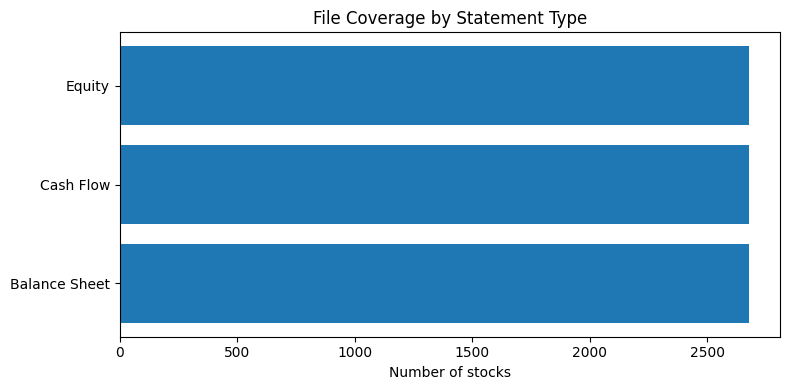

In [31]:
label_map = {
    "condensed_consolidated_balance_sheets.json": "Balance Sheet",
    "condensed_consolidated_statement_of_cash_flows.json": "Cash Flow",
    "condensed_consolidated_statement_of_equity.json": "Equity"
}

labels = [label_map[f] for f in required_files]
counts = [len(file_inventory[f]) for f in required_files]

plt.figure(figsize=(8, 4))
plt.barh(labels, counts)
plt.xlabel("Number of stocks")
plt.title("File Coverage by Statement Type")

plt.tight_layout()
plt.show()

In [32]:
def load_json(filepath):
    """Load and return JSON data"""
    with open(filepath, 'r') as f:
        return json.load(f)

def load_financial_data_from_dir(directory):
    """Load balance sheet, cash flow, and equity JSON files from a directory"""
    files = {
        'bs': 'condensed_consolidated_balance_sheets.json',
        'cf': 'condensed_consolidated_statement_of_cash_flows.json',
        'eq': 'condensed_consolidated_statement_of_equity.json'
    }

    data = {}
    for key, filename in files.items():
        filepath = os.path.join(directory, filename)
        if not os.path.exists(filepath):
            raise FileNotFoundError(f"{filename} not found in {directory}")
        data[key] = load_json(filepath)

    return data['bs'], data['cf'], data['eq']

# Example usage
data_dir = root_dir / 'aa'
bs_data, cf_data, eq_data = load_financial_data_from_dir(data_dir)

print("Data loaded successfully")

Data loaded successfully


In [33]:
def get_all_available_metrics(data):
    """Get ALL metrics available in the JSON data"""
    all_metrics = set()

    for filing in data.get('filings', []):
        facts = filing.get('facts', {}).get('us-gaap', {})
        all_metrics.update(facts.keys())

    return sorted(list(all_metrics))

bs_all_metrics = get_all_available_metrics(bs_data)
cf_all_metrics = get_all_available_metrics(cf_data)
eq_all_metrics = get_all_available_metrics(eq_data)

print("BALANCE SHEET METRICS")
print("=" * 80)
print(f"Total metrics: {len(bs_all_metrics)}")
print("\nAll metrics:")
for i, metric in enumerate(bs_all_metrics, 1):
    print(f"{i:3d}. {metric}")

BALANCE SHEET METRICS
Total metrics: 10

All metrics:
  1. AccountsPayableCurrent
  2. AccountsReceivableNetCurrent
  3. Assets
  4. AssetsCurrent
  5. CommonStockValue
  6. InventoryNet
  7. Liabilities
  8. LiabilitiesCurrent
  9. PropertyPlantAndEquipmentNet
 10. StockholdersEquity


In [34]:
print("CASH FLOW METRICS")
print("=" * 80)
print(f"Total metrics: {len(cf_all_metrics)}")
print("\nAll metrics:")
for i, metric in enumerate(cf_all_metrics, 1):
    print(f"{i:3d}. {metric}")

CASH FLOW METRICS
Total metrics: 6

All metrics:
  1. CashAndCashEquivalentsPeriodIncreaseDecrease
  2. NetCashProvidedByUsedInFinancingActivities
  3. NetCashProvidedByUsedInInvestingActivities
  4. NetCashProvidedByUsedInOperatingActivities
  5. PaymentsToAcquirePropertyPlantAndEquipment
  6. ProceedsFromSaleOfPropertyPlantAndEquipment


In [35]:
print("EQUITY METRICS")
print("=" * 80)
print(f"Total metrics: {len(eq_all_metrics)}")
print("\nAll metrics:")
for i, metric in enumerate(eq_all_metrics, 1):
    print(f"{i:3d}. {metric}")

EQUITY METRICS
Total metrics: 9

All metrics:
  1. CommonStockValue
  2. DividendsCommonStockCash
  3. DividendsPayableAmountPerShare
  4. PaymentsRelatedToTaxWithholdingForShareBasedCompensation
  5. RetainedEarningsAccumulatedDeficit
  6. StockIssuedDuringPeriodSharesShareBasedCompensation
  7. StockIssuedDuringPeriodValueShareBasedCompensation
  8. StockRepurchaseProgramAuthorizedAmount1
  9. StockRepurchaseProgramRemainingAuthorizedRepurchaseAmount1


In [36]:
def search_metrics(all_metrics_dict, search_term):
    """Search for metrics containing a specific term"""
    results = {}

    for source, metrics in all_metrics_dict.items():
        matching = [m for m in metrics if search_term.lower() in m.lower()]
        if matching:
            results[source] = matching

    return results

all_metrics_dict = {
    'Balance Sheet': bs_all_metrics,
    'Cash Flow': cf_all_metrics,
    'Equity': eq_all_metrics
}

search_terms = ['revenue', 'income', 'sales', 'profit', 'cash', 'asset', 'liab', 'equity', 'debt']

print("SEARCHING FOR KEY FINANCIAL METRICS")
print("=" * 80)

for term in search_terms:
    results = search_metrics(all_metrics_dict, term)
    if results:
        print(f"\nSearch term: '{term}'")
        for source, metrics in results.items():
            print(f"\n  {source}:")
            for metric in metrics[:20]:  
                print(f"    - {metric}")
            if len(metrics) > 10:
                print(f"    ... and {len(metrics) - 10} more")

SEARCHING FOR KEY FINANCIAL METRICS

Search term: 'cash'

  Cash Flow:
    - CashAndCashEquivalentsPeriodIncreaseDecrease
    - NetCashProvidedByUsedInFinancingActivities
    - NetCashProvidedByUsedInInvestingActivities
    - NetCashProvidedByUsedInOperatingActivities

  Equity:
    - DividendsCommonStockCash

Search term: 'asset'

  Balance Sheet:
    - Assets
    - AssetsCurrent

Search term: 'liab'

  Balance Sheet:
    - Liabilities
    - LiabilitiesCurrent

Search term: 'equity'

  Balance Sheet:
    - StockholdersEquity


In [37]:
print("CHECKING JSON STRUCTURE")
print("=" * 80)

print("\nBalance Sheet top-level keys:", list(bs_data.keys()))
print("First filing keys:", list(bs_data['filings'][0].keys()) if bs_data.get('filings') else 'No filings')
print("Facts keys:", list(bs_data['filings'][0]['facts'].keys()) if bs_data.get('filings') else 'No filings')

first_filing = bs_data['filings'][0]
facts = first_filing['facts']['us-gaap']
print(f"\nTotal metrics in first filing: {len(facts)}")
print("\nFirst 5 metrics in first filing:")
for i, metric in enumerate(list(facts.keys())[:5], 1):
    print(f"  {i}. {metric}")

CHECKING JSON STRUCTURE

Balance Sheet top-level keys: ['cik', 'company_name', 'filings']
First filing keys: ['filing_date', 'form', 'year', 'facts']
Facts keys: ['us-gaap', 'dei', 'srt']

Total metrics in first filing: 10

First 5 metrics in first filing:
  1. AccountsPayableCurrent
  2. AccountsReceivableNetCurrent
  3. Assets
  4. AssetsCurrent
  5. CommonStockValue
